In [19]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
np.random.seed(42)

def generate_data(nx, qtde):
    x = np.linspace(-1, 1, nx).reshape(-1, 1)
    y = []
    dy = []
    
    for _ in range(qtde):
        # potencial de grau p aleatório
        A = np.random.randn()
        a = np.random.randn(3)
        b = np.random.randn(3)

        # polinomio de grau p aleatório
        #coeffs = np.random.randn(p + 1)
        polinomio1 = A * ( x**2 - a**2)*(x**2 - b**2)
        polinomio2 = A * x*(x**2 - b**2)
        noise = 0.1 * np.random.randn(len(x)).reshape(-1, 1)
        y.append(polinomio1 / np.max(np.abs(polinomio1)) + noise)
        y.append(polinomio2 / np.max(np.abs(polinomio2)) + noise)
        
        # derivada
        noise = 0.1 * np.random.randn(len(x)).reshape(-1, 1)
        dy.append(2*A*x*(2*x**2 - (a**2 + b**2 )) )
        dy.append(3*A*x**2  - A*b**2)
    
    # empilha dados
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# gerar dados
y, dy = generate_data(50, 10000)

print(y.shape)
print(dy.shape)

(60000, 50)
(60000, 50)


In [21]:
# separa os os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 10
layers = 10

# define modelo
model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=100000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.001,
    n_iter_no_change = 50,
    tol = 1e-8,
    verbose=True)

# treinamento
model.fit(X_train, y_train)

# teste
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Iteration 1, loss = 2.06934433
Iteration 2, loss = 1.62187766
Iteration 3, loss = 1.47706036
Iteration 4, loss = 1.37304818
Iteration 5, loss = 1.31389310
Iteration 6, loss = 1.27644085
Iteration 7, loss = 1.25847488
Iteration 8, loss = 1.23516274
Iteration 9, loss = 1.21566105
Iteration 10, loss = 1.19602657
Iteration 11, loss = 1.18319758
Iteration 12, loss = 1.16700033
Iteration 13, loss = 1.15866701
Iteration 14, loss = 1.14997270
Iteration 15, loss = 1.13524162
Iteration 16, loss = 1.13007137
Iteration 17, loss = 1.12082041
Iteration 18, loss = 1.11669112
Iteration 19, loss = 1.11406175
Iteration 20, loss = 1.10869053
Iteration 21, loss = 1.10742223
Iteration 22, loss = 1.10359637
Iteration 23, loss = 1.09584434
Iteration 24, loss = 1.09253502
Iteration 25, loss = 1.09210331
Iteration 26, loss = 1.08609614
Iteration 27, loss = 1.08650662
Iteration 28, loss = 1.08427502
Iteration 29, loss = 1.08083111
Iteration 30, loss = 1.08180960
Iteration 31, loss = 1.07524858
Iteration 32, los

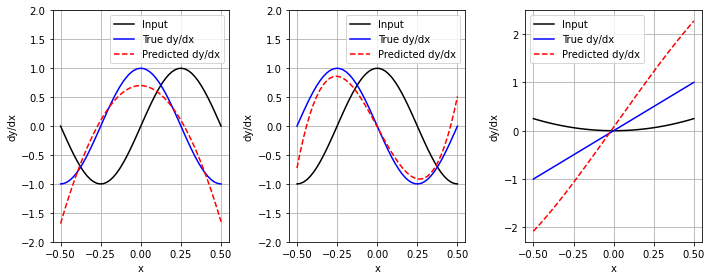

In [23]:
plt.figure(figsize=(10, 4))

new_x = np.linspace(-1/2, 1/2, y.shape[1]).reshape(1,-1)

# test 1
plt.subplot(131)
new_y = np.sin(2*np.pi*new_x)
new_dy = np.cos(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 2
plt.subplot(132)
new_y = np.cos(2*np.pi*new_x)
new_dy = -np.sin(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 3
plt.subplot(133)
new_y = new_x ** 2
new_dy = 2 * new_x
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()